In [1]:
# from agent.graph import graph
from agent.context import Context
from langgraph.store.memory import InMemoryStore
from langgraph.checkpoint.memory import MemorySaver
from agent.graph import builder

# Create the context and store
context = Context(
    user_id="test_user1",
    model="anthropic/claude-3-5-sonnet-20240620",
)

store = InMemoryStore()

# Build the graph with store and checkpointer
graph = builder.compile(store=store, checkpointer=MemorySaver())

# Now invoke the graph with proper configuration

conversation = [
        ["My name is Alice and I love pizza. Remember this."],
        [
            "Hi, I'm Bob and I enjoy playing tennis. Remember this.",
            "Yes, I also have a pet dog named Max.",
            "Max is a golden retriever and he's 5 years old. Please remember this too.",
        ],
        [
            "Hello, I'm Charlie. I work as a software engineer and I'm passionate about AI. Remember this.",
            "I specialize in machine learning algorithms and I'm currently working on a project involving natural language processing.",
            "My main goal is to improve sentiment analysis accuracy in multi-lingual texts. It's challenging but exciting.",
            "We've made some progress using transformer models, but we're still working on handling context and idioms across languages.",
            "Chinese and English have been the most challenging pair so far due to their vast differences in structure and cultural contexts.",
        ],
    ]


res =  await graph.ainvoke(
        {"messages": [("user", "Hello, how are you?")]},
        {"thread_id": "thread1"},
        context=context,
    )

namespace = ("memories", context.user_id)
memories = store.search(namespace)

# ls.expect(len(memories)).to_be_greater_than(0)

bad_namespace = ("memories", "wrong-user")
bad_memories = store.search(bad_namespace)
# ls.expect(len(bad_memories)).to_equal(0)

In [3]:
res['messages'][-1]

AIMessage(content="Hello! I'm doing well, thank you for asking. As your Fitbit AI Health Assistant, I'm here to help you make healthier lifestyle choices and provide personalized insights based on your health data. How can I assist you today? \n\nWould you like to:\n1. Review your recent activity data?\n2. Get insights on your sleep patterns?\n3. Discuss your current health goals?\n4. Learn about new features or tips to improve your health tracking?\n\nFeel free to ask about any of these topics or anything else related to your health and fitness journey. I'm here to help!", additional_kwargs={}, response_metadata={'id': 'msg_01D9gLQVhnRWKAjRsaBbfBcF', 'model': 'claude-3-5-sonnet-20240620', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 713, 'output_tokens': 131, 'server_tool_use': None, 'service_tier': 'standard

In [4]:
bad_memories

[]

In [1]:
res

NameError: name 'res' is not defined

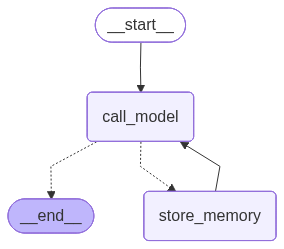

In [5]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [8]:

state = graph.get_state(config={"configurable":{"thread_id": "thread1"}})
print(state)

StateSnapshot(values={'messages': [HumanMessage(content=['My name is Alice and I love pizza. Remember this.'], additional_kwargs={}, response_metadata={}, id='db33ad24-8e04-4c93-a58a-87af87008c21'), AIMessage(content=[{'text': "Hello Alice! It's wonderful to meet you. I'm delighted to learn that you love pizza - it's such a popular and delicious food! I'd be happy to remember this information about you. Let me store that in my memory.", 'type': 'text'}, {'id': 'toolu_01KBbUnAev6Dm6Q5V4aCyZrr', 'input': {'content': 'Alice loves pizza.', 'context': 'This was mentioned during the initial introduction.'}, 'name': 'upsert_memory', 'type': 'tool_use'}], additional_kwargs={}, response_metadata={'id': 'msg_01TKaUrpxeGytQhGw34xBJCv', 'model': 'claude-3-5-sonnet-20240620', 'stop_reason': 'tool_use', 'stop_sequence': None, 'usage': {'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 58

In [9]:
state.values['messages']

[HumanMessage(content=['My name is Alice and I love pizza. Remember this.'], additional_kwargs={}, response_metadata={}, id='db33ad24-8e04-4c93-a58a-87af87008c21'),
 AIMessage(content=[{'text': "Hello Alice! It's wonderful to meet you. I'm delighted to learn that you love pizza - it's such a popular and delicious food! I'd be happy to remember this information about you. Let me store that in my memory.", 'type': 'text'}, {'id': 'toolu_01KBbUnAev6Dm6Q5V4aCyZrr', 'input': {'content': 'Alice loves pizza.', 'context': 'This was mentioned during the initial introduction.'}, 'name': 'upsert_memory', 'type': 'tool_use'}], additional_kwargs={}, response_metadata={'id': 'msg_01TKaUrpxeGytQhGw34xBJCv', 'model': 'claude-3-5-sonnet-20240620', 'stop_reason': 'tool_use', 'stop_sequence': None, 'usage': {'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 587, 'output_tokens': 131, 'server_